# **Loading the Libraries and Data**

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/customer-segmentation-dataset")

print("Path to dataset files:", path)

100%|██████████| 21.8M/21.8M [00:00<00:00, 68.3MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/yasserh/customer-segmentation-dataset/versions/1


In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_column', None)

from datetime import datetime,timedelta
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

import scipy.stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

sns.set()
import warnings
warnings.filterwarnings('ignore')

In [3]:
!ls /root/.cache/kagglehub/datasets/yasserh/customer-segmentation-dataset/versions/1

'Online Retail.xlsx'


In [4]:
df = pd.read_excel('/root/.cache/kagglehub/datasets/yasserh/customer-segmentation-dataset/versions/1/Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.shape

(541909, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
df.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [8]:
df.duplicated().sum()

5268

In [9]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [10]:
df.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

# **Data Cleaning**

In [11]:
df1 = df.copy()

In [12]:
df1.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [13]:
df1.drop_duplicates(inplace = True)
df1.reset_index(drop = True, inplace = True)
df1.duplicated().sum()

0

# **Feature Engineering**

In [14]:
df2 = df1.copy()

In [15]:
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [16]:
# Calculate the Revenue

df2['Revenue'] =  df2['Quantity'] * df2['UnitPrice']
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [17]:
df3 = df2.copy()

In [18]:
# Drop Unnecessary Columns

df3.drop(['InvoiceNo', 'StockCode', 'Description', 'InvoiceDate', 'CustomerID', 'Country'], axis = 1, inplace = True)
df3.head(3)

,Quantity,UnitPrice,Revenue
0,6,2.55,15.30
1,6,3.39,20.34
2,8,2.75,22.00


In [19]:
df3.isna().sum()

,0
Quantity,0
UnitPrice,0
Revenue,0


# **Data Preprocessing**

**We will perform the following transformtions:**

1) Removing Outliers

2) Log transformation of some of the Skewed Features.

3) Min Max Scaling all the features.


In [20]:
df4 = df3.copy()

In [21]:
df4.dtypes

,0
Quantity,int64
UnitPrice,float64
Revenue,float64


In [22]:
df4.describe()

,Quantity,UnitPrice,Revenue
count,536641.000000,536641.000000,536641.000000
mean,9.620029,4.632656,18.123861
std,219.130156,97.233118,380.656263
min,-80995.000000,-11062.060000,-168469.600000
25%,1.000000,1.250000,3.750000
50%,3.000000,2.080000,9.870000
75%,10.000000,4.130000,17.400000
max,80995.000000,38970.000000,168469.600000


In [23]:
df4['Quantity'].quantile(0.995)

160.0

In [24]:
df4['UnitPrice'].quantile(0.995)

24.96

**Treat the quantity and unit price values more than 99.5th percentiles as outliers**

In [25]:
df4 = df4[(df4['Quantity'] >= 0) & (df4['Quantity'] <= df4['Quantity'].quantile(0.995)) & (df4['UnitPrice'] >= 1) & (df4['UnitPrice'] <= df4['UnitPrice'].quantile(0.995))]
df4.reset_index(drop = True, inplace = True)
df4.describe().round(2)

,Quantity,UnitPrice,Revenue
count,411663.00,411663.00,411663.00
mean,6.90,3.89,18.89
std,13.17,3.31,36.61
min,1.00,1.00,1.00
25%,1.00,1.65,4.21
50%,3.00,2.89,11.80
75%,8.00,4.95,19.50
max,160.00,24.96,2598.75


In [26]:
df4.shape

(411663, 3)

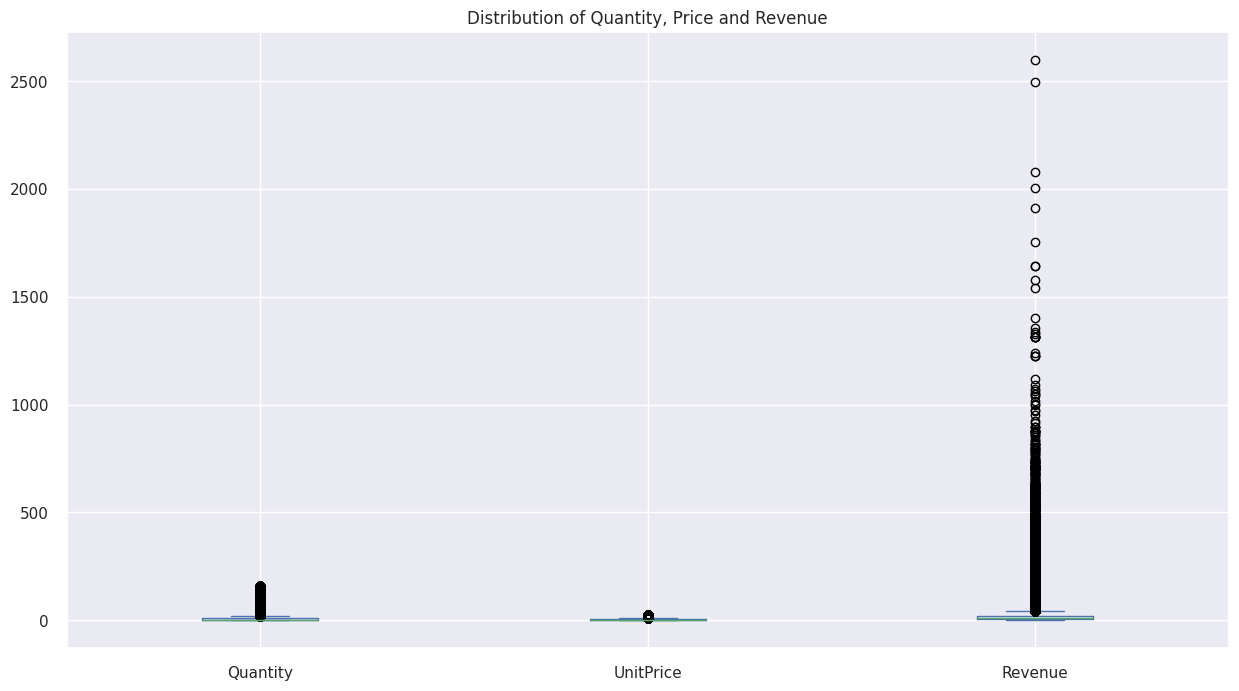

In [27]:
df4.plot(kind = 'box', figsize = (15, 8))
plt.title('Distribution of Quantity, Price and Revenue')
plt.show()

In [28]:
skew_df = pd.DataFrame(df4.select_dtypes(np.number).columns, columns = ['Feature'])
skew_df

,Feature
0,Quantity
1,UnitPrice
2,Revenue


In [29]:
skew_df['Skew'] = skew_df['Feature'].apply(lambda x: scipy.stats.skew(df4[x]))
skew_df

,Feature,Skew
0,Quantity,5.866866
1,UnitPrice,2.380332
2,Revenue,12.328720


In [30]:
skew_df['Skewed'] = skew_df['Skew'].apply(lambda x: True if x >= 0.5 else False)
skew_df

,Feature,Skew,Skewed
0,Quantity,5.866866,True
1,UnitPrice,2.380332,True
2,Revenue,12.328720,True


In [31]:
for column in skew_df.query("Skewed == True")['Feature'].values:
  df4[column] = np.log1p(df4[column])

df4.head()

,Quantity,UnitPrice,Revenue
0,1.945910,1.266948,2.791165
1,1.945910,1.479329,3.060583
2,2.197225,1.321756,3.135494
3,1.945910,1.479329,3.060583
4,1.945910,1.479329,3.060583


In [32]:
df5 = df4.copy()

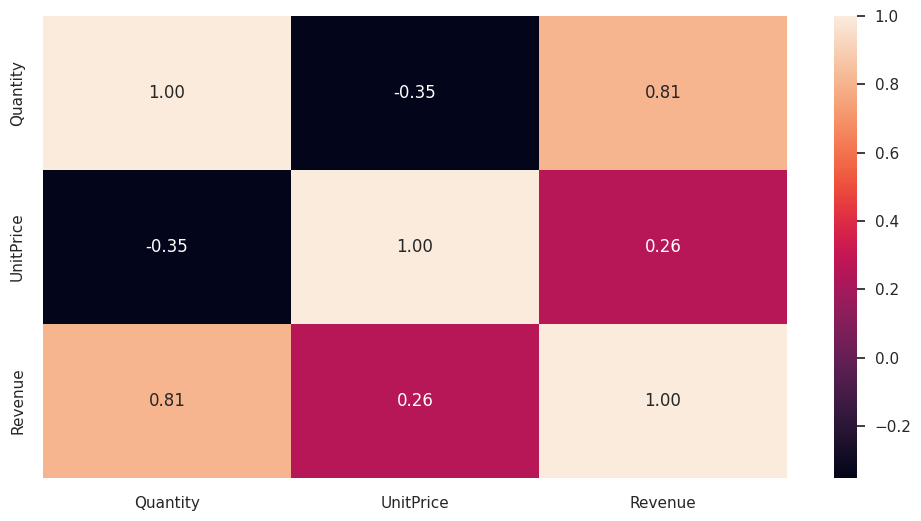

In [33]:
plt.figure(figsize= (12, 6))
sns.heatmap(df5.corr(), annot = True, fmt = '.2f');

In [34]:
df5.shape

(411663, 3)

In [35]:
df6 = df5.copy()

In [36]:
scaler = MinMaxScaler()
scaler.fit(df6)

df6 = pd.DataFrame(scaler.transform(df6), columns=df6.columns)
df6.head()

,Quantity,UnitPrice,Revenue
0,0.285481,0.223843,0.292610
1,0.285481,0.306694,0.330185
2,0.342751,0.245224,0.340633
3,0.285481,0.306694,0.330185
4,0.285481,0.306694,0.330185


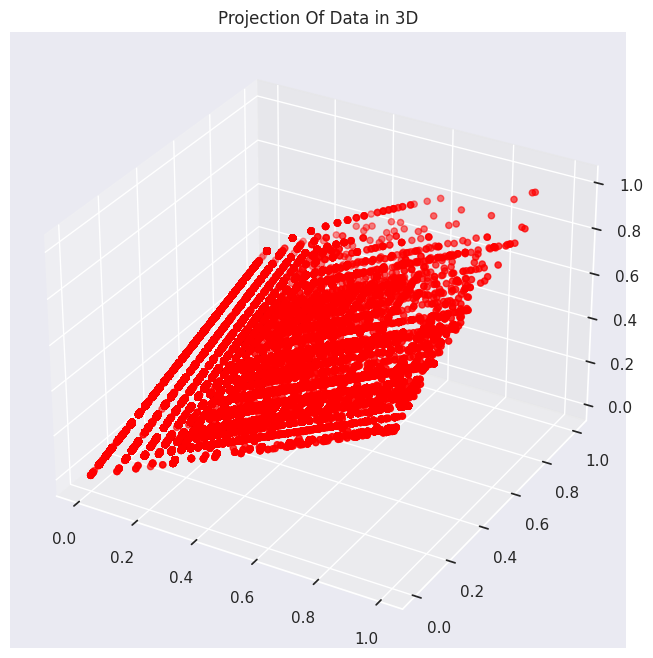

In [37]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(df6["Quantity"], df6["UnitPrice"], df6["Revenue"], c="red", marker="o")
ax.set_title("Projection Of Data in 3D")
plt.show()

# **Clustering**

Let us perform KMeans Clustering. The steps are:-

1) Finding right number of cluster through elbow method.

2) Fitting KMeans Clustering model.

3) Examining the clusters.

*** For smaller dataset, perform Agglomerative Clustering (Hierarchical Clustering). Hierarchical Clustering takes more time to run and can crash the memory for larger datasets.

In [38]:
df7 = df6.copy()

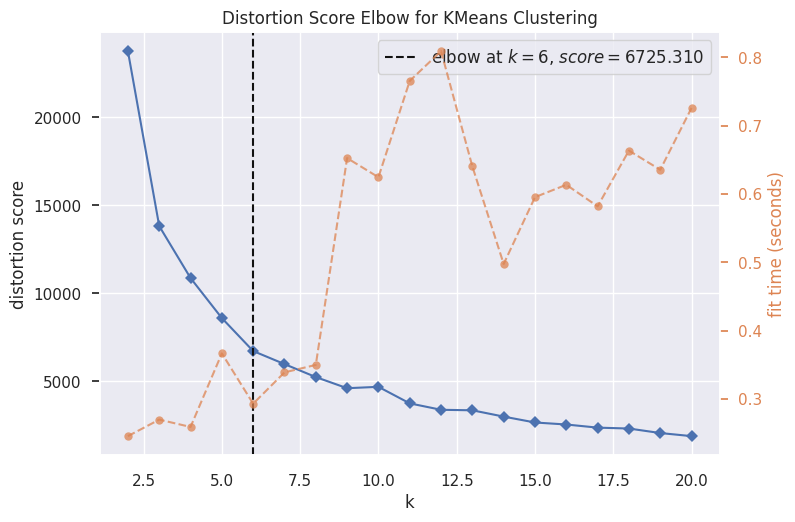

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [39]:
Elbow = KElbowVisualizer(KMeans(), k = 20)
Elbow.fit(df7)
Elbow.show()


**Optimal Number of Clusters (\( k \))**:
   - The elbow point is identified at \( k = 6 \). This is where the rate of decrease in inertia slows significantly, indicating that increasing the number of clusters beyond this point provides diminishing returns in cluster compactness.

In [40]:
kmeans = KMeans(n_clusters=6, random_state=42)
yhat = kmeans.fit_predict(df7)
yhat

array([1, 4, 0, ..., 4, 4, 4], dtype=int32)

In [41]:
df7['Clusters'] = yhat
df7.head()

,Quantity,UnitPrice,Revenue,Clusters
0,0.285481,0.223843,0.292610,1
1,0.285481,0.306694,0.330185,4
2,0.342751,0.245224,0.340633,0
3,0.285481,0.306694,0.330185,4
4,0.285481,0.306694,0.330185,4


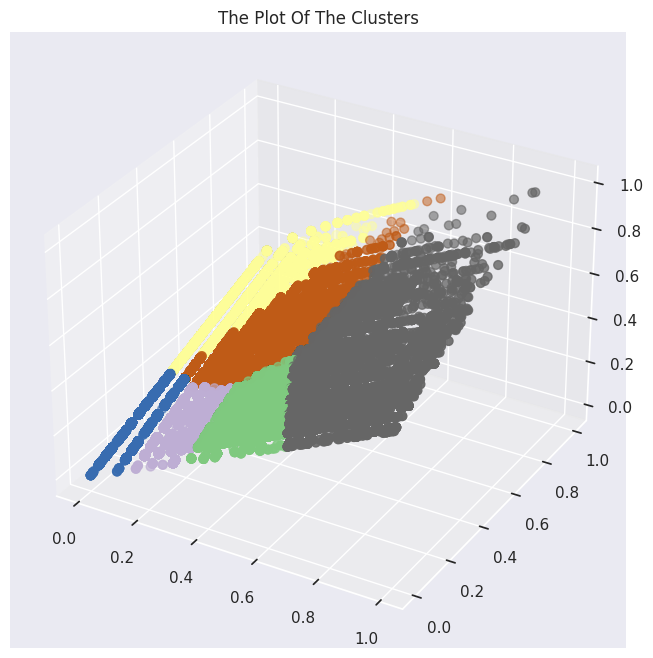

In [42]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(df7["Quantity"], df7["UnitPrice"], df7["Revenue"], s=40, c=df7["Clusters"], marker='o', cmap = "Accent")
ax.set_title("The Plot Of The Clusters")
plt.show()



### Observations:
1. **Distinct Clusters:** The clusters are clearly separated, which aligns with the excellent classification metrics.
2. **Compactness:** Each cluster is tightly packed, indicating low intra-cluster variance.
3. **Distribution:** The axes suggest normalized data, which is a good preprocessing step for clustering algorithms.


In [43]:
print("Inertia:", kmeans.inertia_)

Inertia: 7646.878803418701


In [44]:
# from sklearn.metrics import silhouette_score

# silhouette_score(df7, yhat)  # Took 2005.384 seconds

print("Silhouette Score is: 0.8495711327367153")

Silhouette Score is: 0.8495711327367153



**Current Inertia Value**:
   - At \( k = 6 \), the inertia is **7646.88**, which aligns well with the elbow method. It suggests that the clustering has achieved a reasonable balance between compactness and separation for \( k = 6 \).

A **Silhouette Score** of **0.8496** is excellent and suggests that your clusters are:

1. **Well-Separated**: Each cluster is clearly distinct, with minimal overlap between clusters.
2. **Compact**: Data points within each cluster are close to the cluster's centroid.

This score, combined with the inertia and the elbow method results, indicates that \( k = 6 \) is likely the optimal number of clusters for your data.

In [45]:
df7 = df7.replace({0:'Cluster 1', 1:'Cluster 2', 2:'Cluster 3', 3:'Cluster 4', 4:'Cluster 5', 5:'Cluster 6'})
df7.head()

,Quantity,UnitPrice,Revenue,Clusters
0,0.285481,0.223843,0.29261,Cluster 2
1,0.285481,0.306694,0.330185,Cluster 5
2,0.342751,0.245224,0.340633,Cluster 1
3,0.285481,0.306694,0.330185,Cluster 5
4,0.285481,0.306694,0.330185,Cluster 5


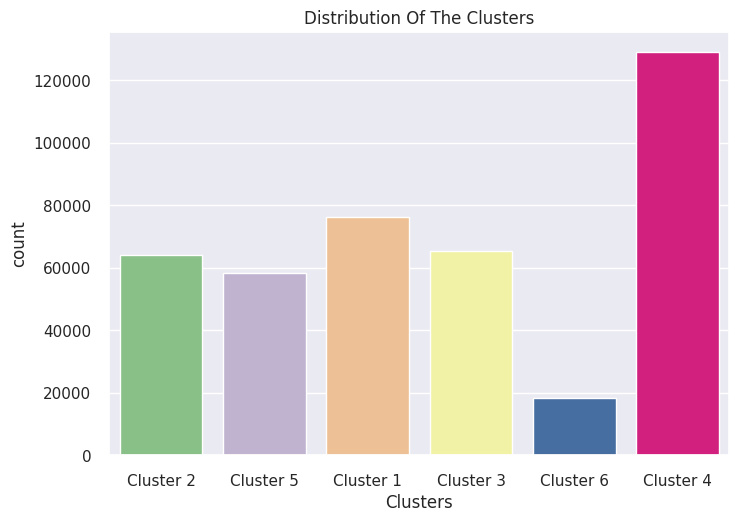

In [46]:
sns.countplot(x = df7['Clusters'], palette= "Accent")
plt.title('Distribution Of The Clusters')
plt.show()



**Overall Observations:**

* The chart displays the distribution of data points across seven different clusters.
* Cluster 4 has the highest count, with approximately 120,000 data points.
* Cluster 2 has the second-highest count, with around 65,000 data points.
* Clusters 5, 1, and 3 have counts between 50,000 and 60,000.
* Cluster 6 has the lowest count, with approximately 20,000 data points.

**Possible Inferences:**

* The data points are not evenly distributed across the clusters.
* Cluster 4 is the most populated cluster, indicating that it might represent a common or dominant characteristic or behavior.
* Clusters 2, 5, 1, and 3 have similar counts, suggesting that the data points in these clusters might share some similarities.
* Cluster 6 is the least populated cluster, suggesting that it might represent a less common or distinct characteristic or behavior.



# **Cluster Profiling**

We need to assign the cluster levels from "df7" to the "df2" and make summary statistics of different variables for different clusters.

This is called ***Cluster Profiling***.

In [47]:
df2.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00


In [48]:
final = df2.merge(df7['Clusters'], left_index = True, right_index = True)
final.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Clusters
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,Cluster 2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Cluster 5
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,Cluster 1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Cluster 5
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Cluster 5


In [49]:
final.describe().round(2)

,Quantity,InvoiceDate,UnitPrice,CustomerID,Revenue
count,411663.00,411663,411663.00,307184.00,411663.00
mean,9.88,2011-05-23 20:41:25.375125248,4.72,15271.33,18.39
min,-74215.00,2010-12-01 08:26:00,-11062.06,12346.00,-77183.60
25%,1.00,2011-02-28 10:34:00,1.25,13881.00,3.75
50%,3.00,2011-05-29 14:13:00,2.10,15132.00,9.95
75%,12.00,2011-08-24 10:13:00,4.13,16779.00,17.70
max,74215.00,2011-10-24 14:36:00,38970.00,18287.00,77183.60
std,172.68,NaN,102.65,1715.71,218.91


In [50]:
final = final[(final['Quantity'] >= 0) & (final['Quantity'] <= final['Quantity'].quantile(0.995)) & (final['UnitPrice'] >= 1) & (final['UnitPrice'] <= final['UnitPrice'].quantile(0.995))]
final.reset_index(drop = True, inplace = True)
final.describe().round(2)

,Quantity,InvoiceDate,UnitPrice,CustomerID,Revenue
count,316314.00,316314,316314.00,229443.00,316314.00
mean,7.14,2011-05-21 10:14:36.807602176,3.93,15285.79,19.40
min,1.00,2010-12-01 08:26:00,1.00,12347.00,1.00
25%,1.00,2011-02-23 13:21:00,1.65,13911.00,4.89
50%,3.00,2011-05-24 15:54:00,2.92,15150.00,12.46
75%,8.00,2011-08-22 14:38:00,4.95,16794.00,19.80
max,192.00,2011-10-24 14:36:00,25.49,18287.00,2598.75
std,14.07,NaN,3.36,1713.50,38.72


In [58]:
cluster_country = final.groupby(['Country', 'Clusters'])['Clusters'].count().sort_values(ascending = False).reset_index(name = 'Count')
max_cluster_per_country = cluster_country.loc[
    cluster_country.groupby('Country')['Count'].idxmax()
]
print(max_cluster_per_country.sort_values(by = 'Count', ascending=False))

                  Country   Clusters  Count
0          United Kingdom  Cluster 4  90537
6                 Germany  Cluster 4   1998
7                  France  Cluster 4   1571
8                    EIRE  Cluster 4   1547
21                  Spain  Cluster 4    511
22                Belgium  Cluster 4    403
23            Netherlands  Cluster 4    347
24               Portugal  Cluster 4    340
26            Switzerland  Cluster 4    290
31              Australia  Cluster 4    243
34                 Norway  Cluster 4    222
41        Channel Islands  Cluster 4    186
52                 Cyprus  Cluster 4    134
58                Finland  Cluster 4    105
59                  Italy  Cluster 1    100
64                Austria  Cluster 4     86
68                 Israel  Cluster 4     76
73            Unspecified  Cluster 1     74
75              Hong Kong  Cluster 4     69
77                 Sweden  Cluster 4     68
82                 Poland  Cluster 4     62
84                Denmark  Clust

In [53]:
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 58.1 MB/s eta 0:00:00


In [54]:
!pip install pycountry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 29.7 MB/s eta 0:00:00


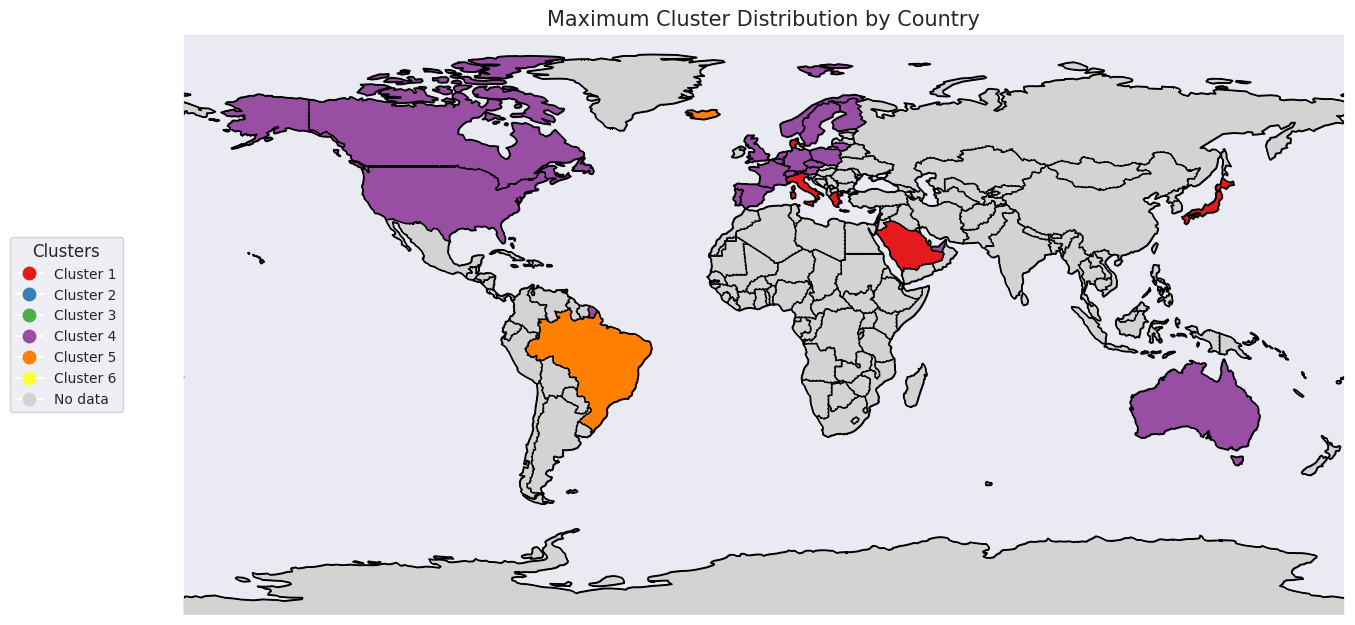

In [63]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import pycountry
from cartopy.io.shapereader import natural_earth, Reader

# Function to get ISO Alpha-3 codes
def get_iso_alpha_3(country_name):
    try:
        return pycountry.countries.lookup(country_name).alpha_3
    except LookupError:
        return None


# Add ISO codes to the DataFrame
max_cluster_per_country['ISO'] = max_cluster_per_country['Country'].apply(get_iso_alpha_3)

# Load country geometries from Cartopy
shapefile_path = natural_earth(resolution='110m', category='cultural', name='admin_0_countries')
shape_records = Reader(shapefile_path).records()

# Define fixed colors for clusters
cluster_colors = {
    "Cluster 1": "#e41a1c",  # Red
    "Cluster 2": "#377eb8",  # Blue
    "Cluster 3": "#4daf4a",  # Green
    "Cluster 4": "#984ea3",  # Purple
    "Cluster 5": "#ff7f00",  # Orange
    "Cluster 6": "#ffff33"   # Yellow
}

# Initialize the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Map ISO codes to count and cluster values for coloring
iso_to_count = dict(zip(max_cluster_per_country['ISO'], max_cluster_per_country['Count']))
iso_to_cluster = dict(zip(max_cluster_per_country['ISO'], max_cluster_per_country['Clusters']))

# Plot the countries
for record in shape_records:
    geometry = record.geometry
    iso_code = record.attributes['ADM0_A3']
    count = iso_to_count.get(iso_code, None)
    cluster = iso_to_cluster.get(iso_code, None)

    if count is not None and cluster is not None:
        # Assign color based on cluster
        facecolor = cluster_colors.get(cluster, "gray")
        ax.add_geometries(
            [geometry],
            crs=ccrs.PlateCarree(),
            facecolor=facecolor,
            edgecolor='black'
        )
    else:
        # Color for countries without data
        ax.add_geometries(
            [geometry],
            crs=ccrs.PlateCarree(),
            facecolor='lightgray',
            edgecolor='black'
        )

# Add map features
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.COASTLINE)
ax.set_title("Maximum Cluster Distribution by Country", fontsize=15)

# Create a custom legend for clusters
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label=f'{cluster}',
           markerfacecolor=color, markersize=10)
    for cluster, color in cluster_colors.items()
]
legend_elements.append(Line2D([0], [0], marker='o', color='w', label='No data',
                              markerfacecolor='lightgray', markersize=10))

# Adjust legend position to the center-left
ax.legend(
    handles=legend_elements,
    loc='center',
    fontsize=10,
    title="Clusters",
    bbox_to_anchor=(-0.1, 0.5),  # Center vertically, slightly left of the map
    frameon=True
)

# Show the plot
plt.show()


### **Summary**

The map provides a clear segmentation of retail customers worldwide, highlighting significant geographical clusters. Cluster 4 dominates in many developed markets, indicating similarities in customer profiles or transactional behaviors across these regions. Other clusters represent distinct customer groups, possibly shaped by local market conditions or unique buying patterns. Countries with no data might reflect untapped markets or insufficient data availability.

These insights can guide **customer targeting** and **marketing strategies**:
- Tailoring marketing campaigns to specific cluster behaviors.
- Focusing on regions with dominant clusters for large-scale strategies.
- Exploring opportunities in regions with missing data for potential market expansion.

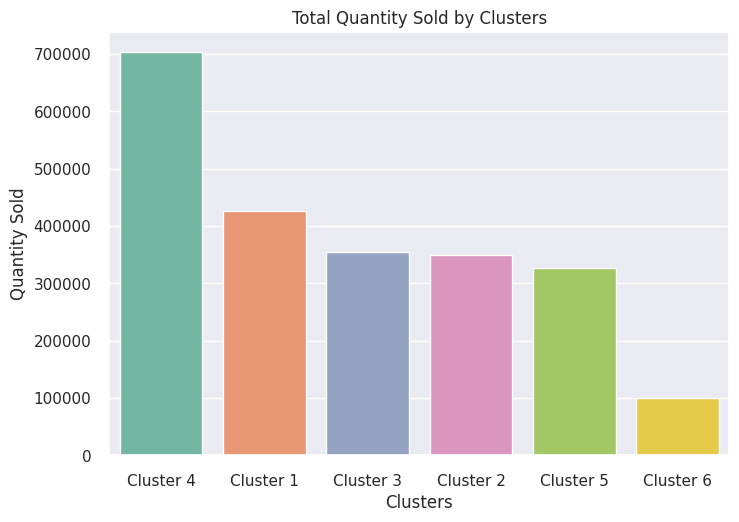

In [ ]:
cluster_quantity_sold = final.groupby('Clusters')['Quantity'].sum().sort_values(ascending = False).reset_index(name = 'Quantity Sold')

sns.barplot(data=cluster_quantity_sold, x='Clusters', y='Quantity Sold', dodge=False, palette='Set2')
plt.title('Total Quantity Sold by Clusters')
plt.show()

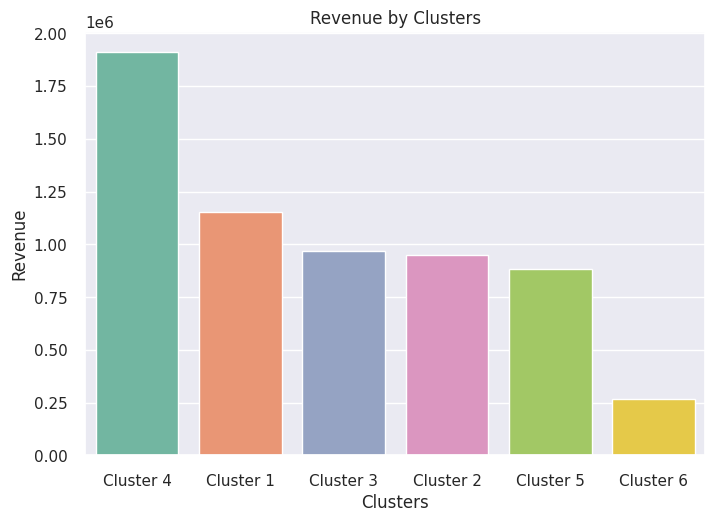

In [ ]:
cluster_revenue = final.groupby('Clusters')['Revenue'].sum().sort_values(ascending = False).reset_index(name = 'Revenue')

sns.barplot(data=cluster_revenue, x='Clusters', y='Revenue', dodge=False, palette='Set2')
plt.title('Revenue by Clusters')
plt.show()

In [ ]:
final['StartOfMonth'] = final['InvoiceDate'].dt.to_period('M').dt.start_time
final.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Clusters,StartOfMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,Cluster 2,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Cluster 5,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,Cluster 1,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Cluster 5,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Cluster 5,2010-12-01


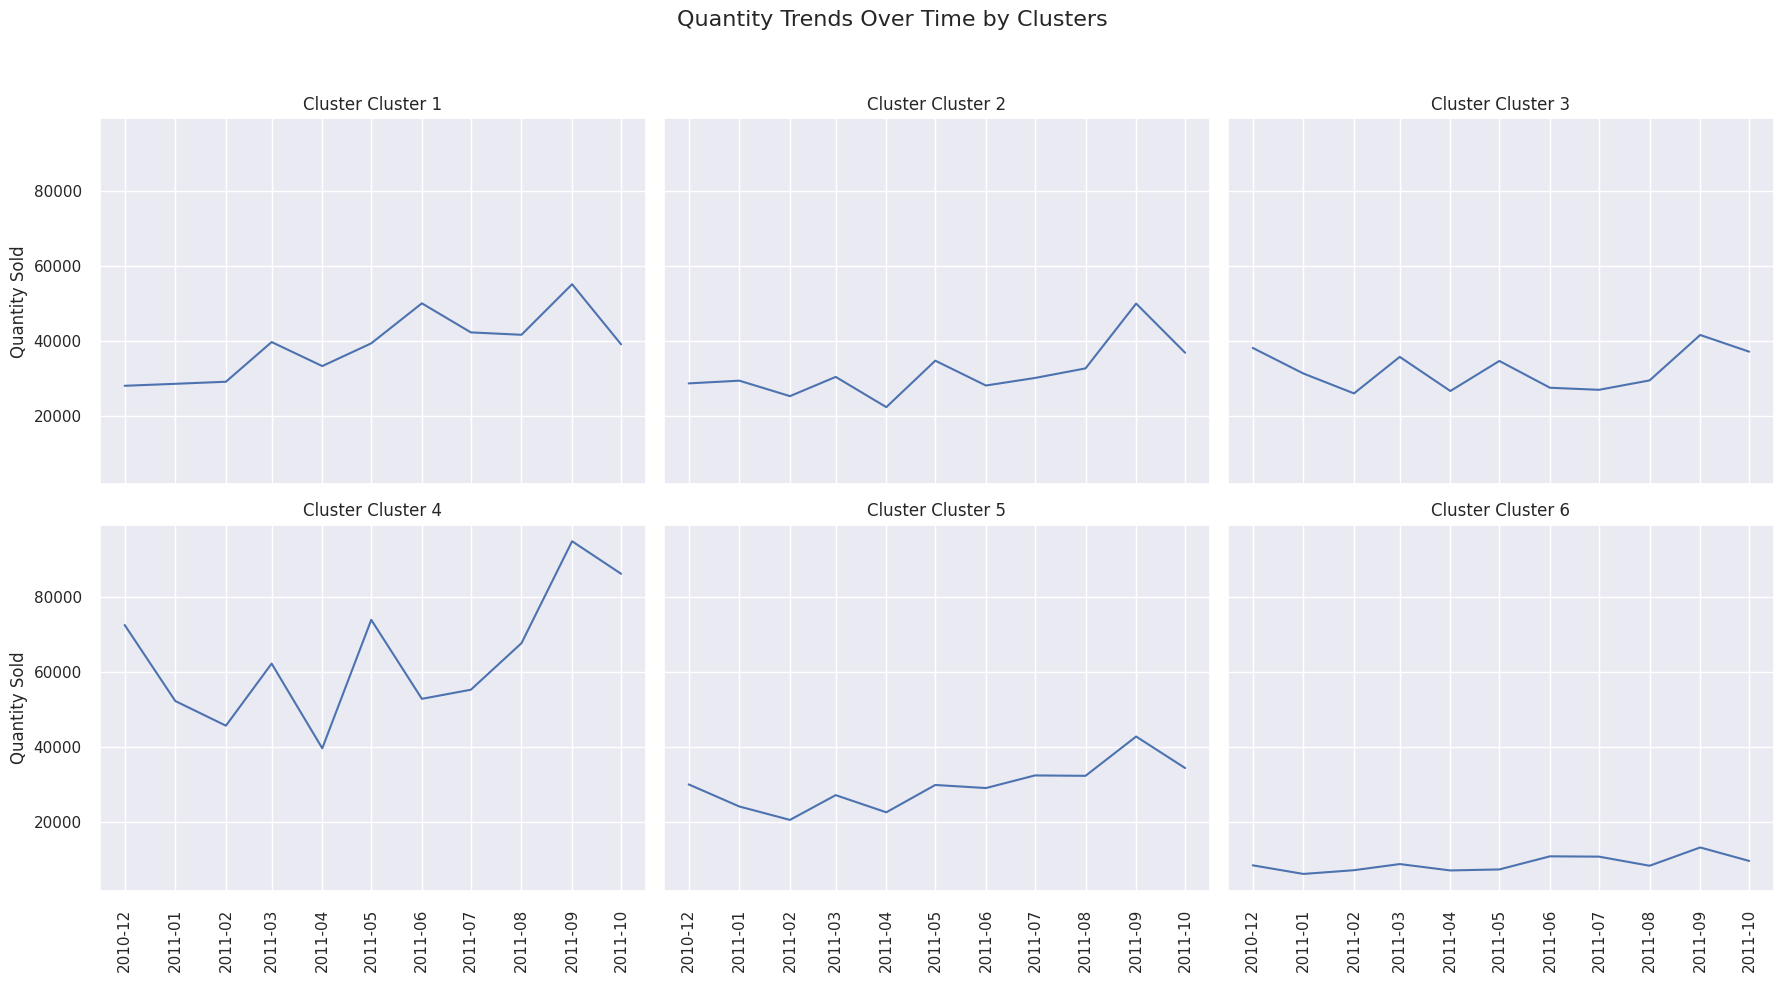

In [ ]:
quantity_trend = final.groupby(['StartOfMonth', 'Clusters'])['Quantity'].sum().reset_index(name = 'Quantity Sold').dropna()

# Create subplots (2x3 layout)
fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharex=True, sharey=True)
fig.suptitle('Quantity Trends Over Time by Clusters', fontsize=16)

# Loop through each cluster and create a plot
clusters = quantity_trend['Clusters'].unique()
for i, cluster in enumerate(clusters):
    ax = axes[i // 3, i % 3]  # Determine subplot position
    cluster_data = quantity_trend[quantity_trend['Clusters'] == cluster]
    sns.lineplot(data=cluster_data, x='StartOfMonth', y='Quantity Sold', ax=ax)
    ax.set_title(f'Cluster {cluster}')
    ax.set_xlabel('')  # Remove x-axis label for cleaner look
    ax.set_ylabel('Quantity Sold')
    ax.tick_params(axis='x', rotation=90)  # Rotate x-axis labels

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the suptitle
plt.show()

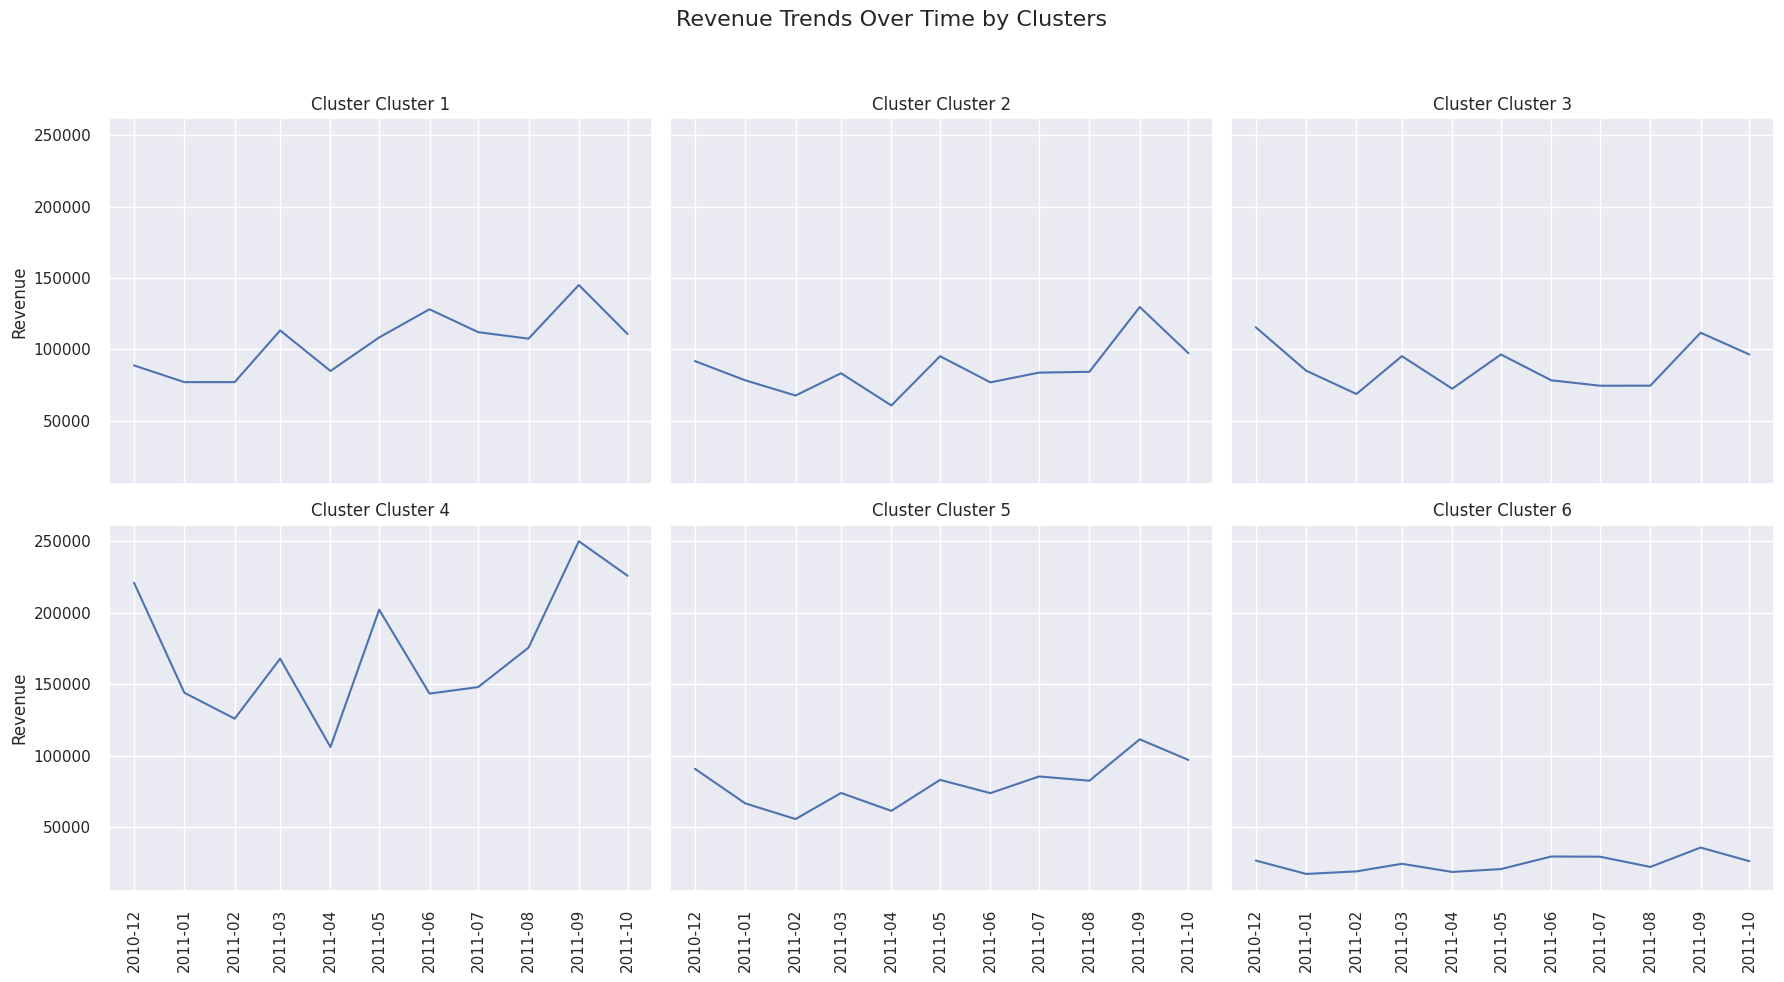

In [ ]:
revenue_trend = final.groupby(['StartOfMonth', 'Clusters'])['Revenue'].sum().reset_index(name = 'Revenue')

# Create subplots (2x3 layout)
fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharex=True, sharey=True)
fig.suptitle('Revenue Trends Over Time by Clusters', fontsize=16)

# Loop through each cluster and create a plot
clusters = revenue_trend['Clusters'].unique()
for i, cluster in enumerate(clusters):
    ax = axes[i // 3, i % 3]  # Determine subplot position
    cluster_data = revenue_trend[revenue_trend['Clusters'] == cluster]
    sns.lineplot(data=cluster_data, x='StartOfMonth', y='Revenue', ax=ax)
    ax.set_title(f'Cluster {cluster}')
    ax.set_xlabel('')  # Remove x-axis label for cleaner look
    ax.set_ylabel('Revenue')
    ax.tick_params(axis='x', rotation=90)  # Rotate x-axis labels

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the suptitle
plt.show()

# **Classification from Clustering Results**

At the beginning of our study, we didn't have any Label/Target Variable in our dataset, which we have now (Cluster Levels). From this we can develop classification models and predict in which group which individual/record should fall for new data.

We will choose the dataframe (data6) as it is cleaned, scaled and have gone through all the preprocessing. We will add the cluster levels from the dataframe "data8" and treat this as the target variable.

In [ ]:
df8 = df7.copy()

In [ ]:
df8.head()

,Quantity,UnitPrice,Revenue,Clusters
0,0.285481,0.223843,0.29261,Cluster 2
1,0.285481,0.306694,0.330185,Cluster 5
2,0.342751,0.245224,0.340633,Cluster 1
3,0.285481,0.306694,0.330185,Cluster 5
4,0.285481,0.306694,0.330185,Cluster 5


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, log_loss

from lightgbm import LGBMClassifier

In [ ]:
cluster_mapping = {
    'Cluster 1': 0,
    'Cluster 2': 1,
    'Cluster 3': 2,
    'Cluster 4': 3,
    'Cluster 5': 4,
    'Cluster 6': 5,
}

df8 = df8.replace(cluster_mapping)

df8.head()

,Quantity,UnitPrice,Revenue,Clusters
0,0.285481,0.223843,0.292610,1
1,0.285481,0.306694,0.330185,4
2,0.342751,0.245224,0.340633,0
3,0.285481,0.306694,0.330185,4
4,0.285481,0.306694,0.330185,4


In [ ]:
X = df8.drop('Clusters', axis = 1)
y = df8['Clusters']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42, shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((329330, 3), (82333, 3), (329330,), (82333,))

In [ ]:
lgbm = LGBMClassifier(n_estimators = 20)
lgbm.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013081 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 493
[LightGBM] [Info] Number of data points in the train set: 329330, number of used features: 3
[LightGBM] [Info] Start training from score -1.683518
[LightGBM] [Info] Start training from score -1.860442
[LightGBM] [Info] Start training from score -1.837944
[LightGBM] [Info] Start training from score -1.160140
[LightGBM] [Info] Start training from score -1.953081
[LightGBM] [Info] Start training from score -3.117821
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier(n_estimators=20)

In [ ]:
print(f"Training Score: {lgbm.score(X_train, y_train)}")

Training Score: 0.9999696353201956


In [ ]:
y_pred = lgbm.predict(X_test)
print(f"Testing Score: {lgbm.score(X_test, y_test)}")

Testing Score: 0.9999635626055167


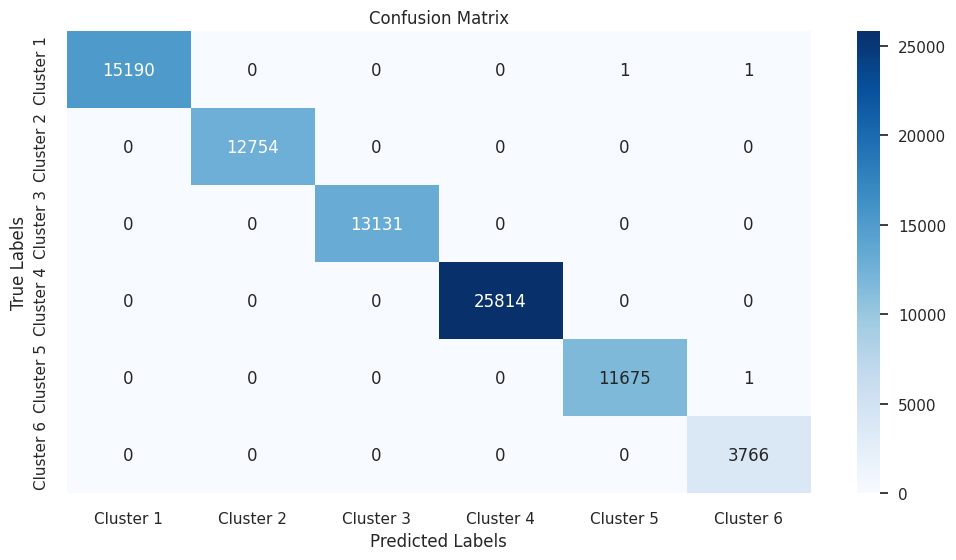

In [ ]:
labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6']

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

This confusion matrix provides an excellent visualization of the clustering performance. Each row represents the actual clusters, and each column represents the predicted clusters.

From the matrix:
- Most points are correctly classified within their respective clusters.
- There doesn't seem to be any misclassification across clusters (off-diagonal elements are all zero), which indicates that the clustering model has separated the data points well.

In [ ]:
report = classification_report(y_test, y_pred, target_names=labels)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

   Cluster 1       1.00      1.00      1.00     15192
   Cluster 2       1.00      1.00      1.00     12754
   Cluster 3       1.00      1.00      1.00     13131
   Cluster 4       1.00      1.00      1.00     25814
   Cluster 5       1.00      1.00      1.00     11676
   Cluster 6       1.00      1.00      1.00      3766

    accuracy                           1.00     82333
   macro avg       1.00      1.00      1.00     82333
weighted avg       1.00      1.00      1.00     82333



In [ ]:
roc_auc = roc_auc_score(y_test, lgbm.predict_proba(X_test), multi_class='ovr', average='macro')
print(f"ROC-AUC Score: {roc_auc:.4f}")

ROC-AUC Score: 1.0000


In [ ]:
logloss = log_loss(y_test, lgbm.predict_proba(X_test))
print(f"Log-Loss: {logloss:.4f}")

Log-Loss: 0.0390




### **Classification Report:**
- **Precision, Recall, F1-Score:** All are 1.00 (or 100%) across clusters, meaning the model perfectly identifies and predicts all clusters without false positives or negatives.
- **Support:** The number of samples in each cluster is well-distributed, and the model maintains its performance for all groups.

### **Accuracy:**
- The accuracy is 1.00 (or 100%), confirming the model's perfect classification on the test set.

### **ROC-AUC Score:**
- A score of **1.0000** indicates perfect discrimination between the clusters.

### **Log-Loss:**
- A value of **0.0390** suggests that the model's probability predictions are highly confident and close to the actual labels.

---

This is an ideal outcome, which often happens when:
1. The clusters are naturally well-separated in the feature space.
2. The dataset has clear and distinct patterns.